In [4]:
!pip install textblob

In [5]:
import pandas as pd
from textblob import TextBlob

In [6]:
stock_data = pd.read_csv('/content/DJIA_table(train).csv')
# news_data = pd.read_csv('/content/Combined_News_DJIA(train).csv')
rnews_data = pd.read_csv('/content/RedditNews(train).csv')

In [7]:
stock_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,31-12-2015,17590.66016,17590.66016,17421.16016,17425.02930,93690000,17425.02930
1,30-12-2015,17711.93945,17714.13086,17588.86914,17603.86914,59760000,17603.86914
2,29-12-2015,17547.36914,17750.01953,17547.36914,17720.98047,69860000,17720.98047
3,28-12-2015,17535.66016,17536.90039,17437.33984,17528.26953,59770000,17528.26953
4,24-12-2015,17593.25977,17606.33984,17543.94922,17552.16992,40350000,17552.16992


In [8]:
print(stock_data.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [9]:
stock_data.shape

(1863, 7)

In [10]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1863 non-null   object 
 1   Open       1863 non-null   float64
 2   High       1863 non-null   float64
 3   Low        1863 non-null   float64
 4   Close      1863 non-null   float64
 5   Volume     1863 non-null   int64  
 6   Adj Close  1863 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 102.0+ KB


In [11]:
stock_data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1863.000000,1863.000000,1863.000000,1863.000000,1.863000e+03,1863.000000
mean,13204.195193,13285.564853,13119.570584,13208.104880,1.662263e+08,13208.104880
std,3080.633638,3072.306029,3089.839032,3081.319402,9.557187e+07,3081.319402
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10753.084960,10859.745115,10651.370115,10752.444825,1.018500e+08,10752.444825
50%,12806.450200,12877.179690,12744.469730,12810.540040,1.392500e+08,12810.540040
75%,16254.470215,16354.635255,16133.435060,16257.040040,1.972900e+08,16257.040040
max,18315.060550,18351.359380,18272.560550,18312.390630,6.749200e+08,18312.390630


In [12]:
stock_data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0


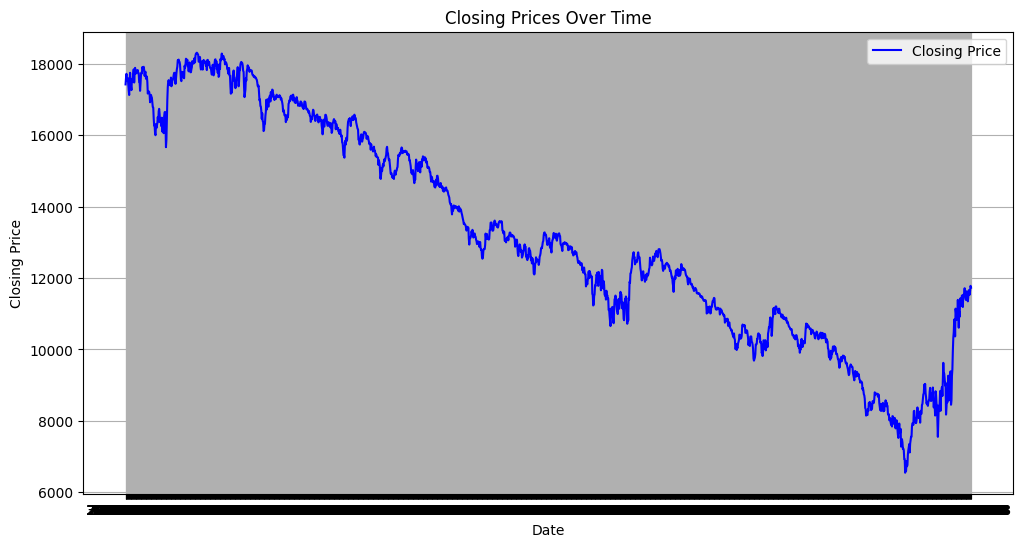

In [13]:
import matplotlib.pyplot as plt

# Sort the data by Date (if not already sorted)
data = stock_data.sort_values(by='Date')

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], color='blue', label='Closing Price')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
stock_data = stock_data[required_columns]

In [15]:
stock_data.head(2)

,Date,Open,High,Low,Close,Volume
0,31-12-2015,17590.66016,17590.66016,17421.16016,17425.02930,93690000
1,30-12-2015,17711.93945,17714.13086,17588.86914,17603.86914,59760000


In [16]:
rnews_data.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


**Perform Sentiment Analysis on Headlines**

In [17]:
def get_Sentiment(text):
  analysis = TextBlob(str(text)) #Handle possible NaN with str
  return analysis.sentiment.polarity #returns a score between -1 and 1

rnews_data['Sentiment'] = rnews_data['News'].apply(get_Sentiment) #Adjust column name as needed
print(rnews_data[['News','Sentiment']].head())

                                                News  Sentiment
0  A 117-year-old woman in Mexico City finally re...  -0.066667
1   IMF chief backs Athens as permanent Olympic host   0.000000
2  The president of France says if Brexit won, so...   0.000000
3  British Man Who Must Give Police 24 Hours' Not...   0.111111
4  100+ Nobel laureates urge Greenpeace to stop o...   0.000000


**Aggregate sentiment by date**

In [18]:
# Ensure date is in datetime format
rnews_data['Date'] = pd.to_datetime(rnews_data['Date'])
stock_data['Date'] = pd.to_datetime(stock_data['Date'])\

# group sentiment score by date and calculate average sentiment
daily_sentiment = rnews_data.groupby('Date')['Sentiment'].mean().reset_index()
print(daily_sentiment.head())

        Date  Sentiment
0 2011-01-23  -0.073012
1 2011-01-24   0.002616
2 2011-01-25  -0.003552
3 2011-01-26   0.027682
4 2011-01-27   0.084977


<ipython-input-18-75389ff4f1d2>:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])\


**merge stock data with sentiment score**

In [19]:
combined_data = pd.merge(stock_data, daily_sentiment, on='Date', how='left')
print(combined_data.head())

        Date         Open         High          Low        Close    Volume  \
0 2015-12-31  17590.66016  17590.66016  17421.16016  17425.02930  93690000   
1 2015-12-30  17711.93945  17714.13086  17588.86914  17603.86914  59760000   
2 2015-12-29  17547.36914  17750.01953  17547.36914  17720.98047  69860000   
3 2015-12-28  17535.66016  17536.90039  17437.33984  17528.26953  59770000   
4 2015-12-24  17593.25977  17606.33984  17543.94922  17552.16992  40350000   

   Sentiment  
0  -0.014438  
1  -0.018924  
2   0.079091  
3   0.013139  
4   0.006151  


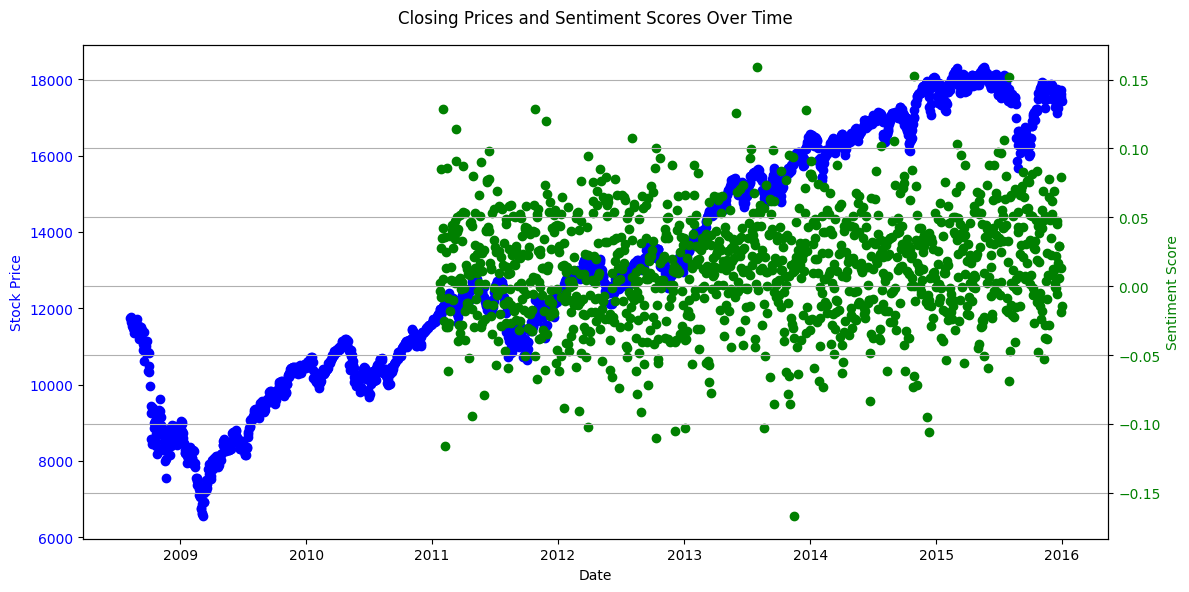

In [20]:
# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot closing prices on the primary y-axis
ax1.scatter(combined_data['Date'], combined_data['Close'], label='Closing Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot sentiment scores on the secondary y-axis
ax2 = ax1.twinx()
ax2.scatter(combined_data['Date'], combined_data['Sentiment'], label='Sentiment Score', color='green')
ax2.set_ylabel('Sentiment Score', color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.suptitle('Closing Prices and Sentiment Scores Over Time')
fig.tight_layout()
plt.grid(True)
plt.show()


**handle missing values**

In [21]:
# Fill missing sentiment scores with zero
combined_data['Sentiment'] = combined_data['Sentiment'].fillna(0)

In [22]:
# Creating a lagged sentiment features
combined_data['Sentiment_lag1'] = combined_data['Sentiment'].shift(1)
combined_data = combined_data.dropna()

**prepare data for modelling**

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Select column to scale
scaler = MinMaxScaler()
columns_to_scale = ['Open', 'Close', 'High', 'Low', 'Volume', 'Sentiment', 'Sentiment_lag1']
combined_data[columns_to_scale] = scaler.fit_transform(combined_data[columns_to_scale])

<ipython-input-24-a9c0b2f31a65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data[columns_to_scale] = scaler.fit_transform(combined_data[columns_to_scale])


In [25]:
train_ratio = 0.8
split_index = int(len(combined_data) * train_ratio)

train_data = combined_data[:split_index]
test_data = combined_data[split_index:]

# Confirm split sizes
print("Train set size: ",len(train_data))
print("Test set size: ",len(test_data))


Train set size:  1489
Test set size:  373


In [26]:
import numpy as np

# Create sequences for LSTM
def create_sequences(data, target_column, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i+sequence_length].drop(target_column, axis=1).values)
        y.append(data.iloc[i+sequence_length][target_column])
    return np.array(X), np.array(y)

sequence_length = 10  # Adjust based on requirements
X_train, y_train = create_sequences(train_data, target_column='Close', sequence_length=sequence_length)
X_test, y_test = create_sequences(test_data, target_column='Close', sequence_length=sequence_length)

# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (1479, 10, 7)
y_train shape: (1479,)


In [27]:
print(X_train[0])  # Print the first sequence
print(X_train.dtype)  # Check the data type

[[Timestamp('2015-12-30 00:00:00') 0.9487492779330959 0.9452635087991301
  0.9420728644396565 0.07704310512970548 0.4544379589197615
  0.46820739704106545]
 [Timestamp('2015-12-29 00:00:00') 0.9347647776092398 0.9483462645264884
  0.9385566931223157 0.09219666621656089 0.7552523892613883
  0.4544379589197615]
 [Timestamp('2015-12-28 00:00:00') 0.9337697971987271 0.9300398115583333
  0.9292342384541934 0.07705810865553404 0.5528416488782207
  0.7552523892613883]
 [Timestamp('2015-12-24 00:00:00') 0.9386643724395405 0.9360045035402902
  0.9382669334931206 0.04792126149645167 0.5313943927275518
  0.5528416488782207]
 [Timestamp('2015-12-23 00:00:00') 0.9245899166915086 0.9361402288449527
  0.9284116255145156 0.12664476151895696 0.6022510872357197
  0.5313943927275518]
 [Timestamp('2015-12-22 00:00:00') 0.9097973156741268 0.9226705574891987
  0.912756488689489 0.12476932079038573 0.6019063161530899
  0.6022510872357197]
 [Timestamp('2015-12-21 00:00:00') 0.9014177350783263 0.90731633605203

In [28]:
# Convert Timestamp to numerical feature
combined_data['Date_numeric'] = combined_data['Date'].apply(lambda x: x.timestamp())
combined_data = combined_data.drop(columns=['Date'])

In [29]:
print(combined_data.dtypes)

Open              float64
High              float64
Low               float64
Close             float64
Volume            float64
Sentiment         float64
Sentiment_lag1    float64
Date_numeric      float64
dtype: object


In [30]:
train_ratio = 0.8
split_index = int(len(combined_data) * train_ratio)

train_data = combined_data[:split_index]
test_data = combined_data[split_index:]

# Confirm split sizes
print("Train set size: ",len(train_data))
print("Test set size: ",len(test_data))


Train set size:  1489
Test set size:  373


In [31]:
import numpy as np

# Create sequences for LSTM
def create_sequences(data, target_column, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data.iloc[i:i+sequence_length].drop(target_column, axis=1).values)
        y.append(data.iloc[i+sequence_length][target_column])
    return np.array(X), np.array(y)

sequence_length = 10  # Adjust based on requirements
X_train, y_train = create_sequences(train_data, target_column='Close', sequence_length=sequence_length)
X_test, y_test = create_sequences(test_data, target_column='Close', sequence_length=sequence_length)

# Check the shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (1479, 10, 7)
y_train shape: (1479,)


In [32]:
print(X_train.dtype)

float64


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
47/47 [==============================] - 4s 27ms/step - loss: 0.1482 - val_loss: 0.1804
Epoch 2/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0701 - val_loss: 0.2046
Epoch 3/20
47/47 [==============================] - 1s 11ms/step - loss: 0.0617 - val_loss: 0.2583
Epoch 4/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0580 - val_loss: 0.2014
Epoch 5/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0540 - val_loss: 0.2141
Epoch 6/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0533 - val_loss: 0.2260
Epoch 7/20
47/47 [==============================] - 1s 13ms/step - loss: 0.0540 - val_loss: 0.2091
Epoch 8/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0526 - val_loss: 0.1797
Epoch 9/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0517 - val_loss: 0.1976
Epoch 10/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0520 - val_loss: 0.1944
Epoch 11/

In [34]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

12/12 [==============================] - 1s 4ms/step
Mean Squared Error: 0.19115891142200045


In [35]:
from sklearn.metrics import mean_absolute_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 0.4256763102104409
Root Mean Squared Error: 0.43721723596171325


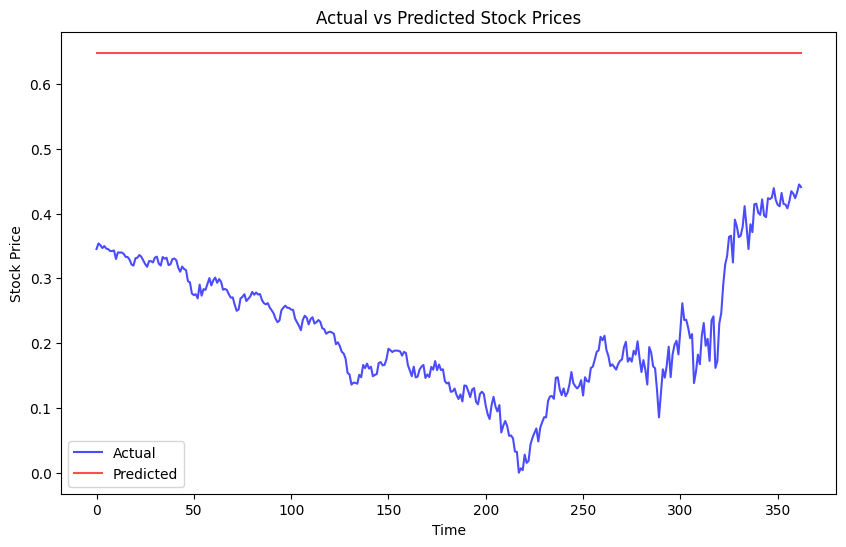

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue', alpha=0.7)
plt.plot(y_pred, label='Predicted', color='red', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

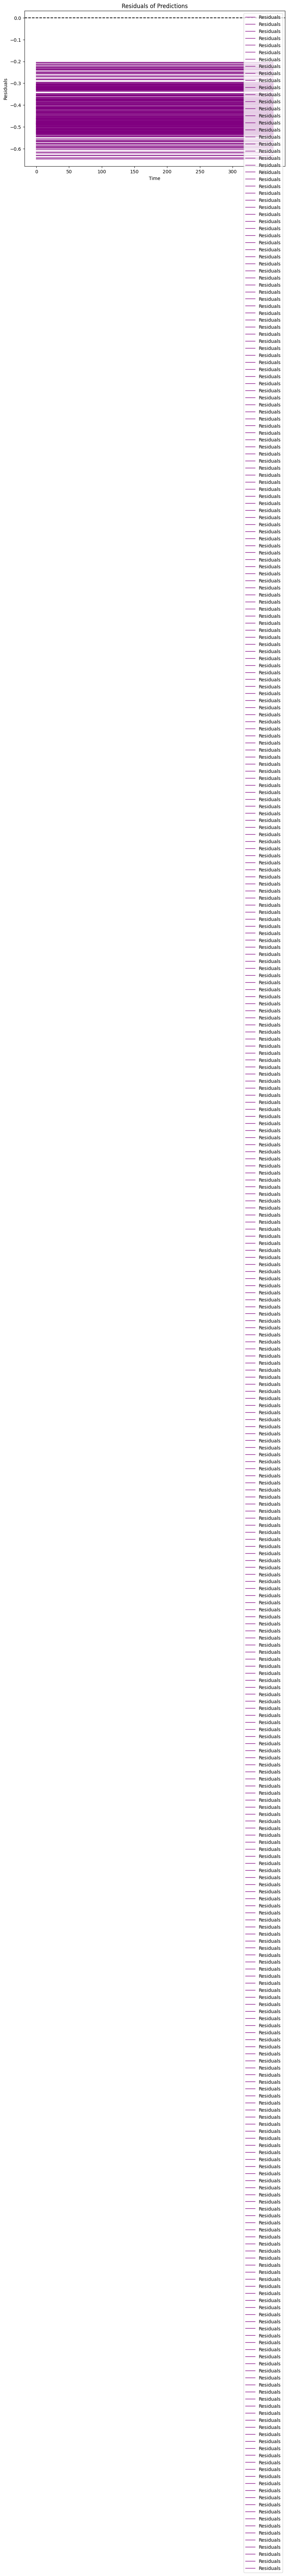

In [37]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals of Predictions')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [38]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# List of optimizers to experiment with
optimizers = {
    "Adam": Adam(learning_rate=0.001),
    "RMSprop": RMSprop(learning_rate=0.001),
    "SGD": SGD(learning_rate=0.01, momentum=0.9)
}

# Dictionary to store results
results = {}

# Loop through each optimizer
for name, optimizer in optimizers.items():
    print(f"\nTraining with optimizer: {name}")

    # Compile the model with the current optimizer
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store the results
    results[name] = {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse
    }

    # Print metrics for the current optimizer
    print(f"Optimizer: {name}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  Root Mean Squared Error (RMSE): {rmse}")

# Compare all results
print("\nComparison of Optimizer Results:")
for name, metrics in results.items():
    print(f"{name}: MSE={metrics['MSE']:.4f}, MAE={metrics['MAE']:.4f}, RMSE={metrics['RMSE']:.4f}")



Training with optimizer: Adam
12/12 [==============================] - 1s 4ms/step
Optimizer: Adam
  Mean Squared Error (MSE): 0.19932837118665736
  Mean Absolute Error (MAE): 0.43516638293764426
  Root Mean Squared Error (RMSE): 0.44646206018726536

Training with optimizer: RMSprop
12/12 [==============================] - 1s 5ms/step
Optimizer: RMSprop
  Mean Squared Error (MSE): 0.1577618920099244
  Mean Absolute Error (MAE): 0.38445194974443747
  Root Mean Squared Error (RMSE): 0.397192512530038

Training with optimizer: SGD
12/12 [==============================] - 1s 5ms/step
Optimizer: SGD
  Mean Squared Error (MSE): 0.18584045230146715
  Mean Absolute Error (MAE): 0.41938271537325217
  Root Mean Squared Error (RMSE): 0.4310921621897888

Comparison of Optimizer Results:
Adam: MSE=0.1993, MAE=0.4352, RMSE=0.4465
RMSprop: MSE=0.1578, MAE=0.3845, RMSE=0.3972
SGD: MSE=0.1858, MAE=0.4194, RMSE=0.4311
